## Import Dependencies for Web Scraping & Analysis

In [544]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup
import pandas as pd
import time
import csv
%matplotlib inline

In [546]:
plt.style.use('seaborn-dark-palette') 
#sns.set_style('dark')

## Web Crawler and Scraper for www.Zolo.ca to extract information for all properties for sale 

#### Define a Dataframe to record data

In [ ]:
df = pd.DataFrame({'address': [''], 'city':[''], 'neighbourhood':[''], 'bed':[''], 'bath':[''], 'type':[''], \
                  'style':[''], 'walk_score':[''], 'lot_size':[''], 'age':[''], 'size':[''], \
                  'listed_price':[''], 'estimated_mortgage':[''], 'property_tax':[''], 'last_sold_price':[''], \
                  'last_sold_year':['']})

#### Login to the Website

In [ ]:
driver = webdriver.Chrome(
        '/Users/shadman/Documents/Data Sceince Bootcamp/WeCloud Bootcamp/Web_Scraping_Project/chromedriver'
        )
driver.get("https://www.zolo.ca/")
time.sleep(2)
login_btn = driver.find_element(By.XPATH,'//*[@id="drawer-menu"]/div/nav/div[3]').click()
time.sleep(2)
email_input = driver.find_element(By.XPATH, '//*[@id="email"]')
email_input.send_keys('shadman_sss@outlook.com')
sign_in = driver.find_element(By.XPATH, '//*[@id="submitEmail"]').click()
time.sleep(2)
access_code = driver.find_element(By.XPATH, '//*[@id="pin"]')
access_code.send_keys('568')
sign_in2 = driver.find_element(By.XPATH, '/html/body/main/div/div/section/form/button').click()
time.sleep(3)

#### Crawler to crawl through each listing and collect info and each page for all the listings in Toronto

In [ ]:
for i in range(1,169):
    url = f'https://www.zolo.ca/page-{i}'
    driver.get(url)
    for i in range(1,37):
        time.sleep(1)
        try:
            block = driver.find_element(By.XPATH, f'//*[@id="gallery"]/div/article[{i}]/div[2]/a').click()
            time.sleep(1)
        except:
            pass
        try:
            block2 = driver.find_element(By.XPATH, '//*[@id="listingModal"]/div[2]/div[2]/a').click()
        except: 
            pass
        soup = BeautifulSoup(driver.page_source, 'lxml')
        try:
            address_block = soup.find(class_ = 'listing-location min-width-0')
            address = address_block.find(class_ = 'address xs-text-2 sm-text-1 truncate heavy').text.replace('\n','').strip()
        except:
            pass
        try:
            city = address_block.find_all(class_ = 'text-primary')[0].text
        except:
            pass
        try:
            neighbourhood = address_block.find_all(class_ = 'text-primary')[1].text
        except:
            pass
        try: 
            bed = address_block.find_all(class_ = 'tile-data xs-inline xs-mr1')[0].text.split()[0]
        except:
            pass
        try:
            bath = address_block.find_all(class_ = 'tile-data xs-inline xs-mr1')[1].text.split()[0]
        except: 
            pass
        try:
            description = soup.find_all('dl', class_ = 'column')
        except:
            pass
        try:
            type_ = description[0].find(class_ = 'priv').text
        except:
            pass
        try:
            style = description[1].find(class_ = 'priv').text
        except:
            pass
        try:
            walk_score = int(description[6].find(class_ = 'column-value').text)
        except:
            pass
        try:
            lot_size = description[3].find(class_ = 'priv').text
            lot_size = float(lot_size.replace('\n','').split()[0])* \
                        float(lot_size.replace('\n','').split()[2])
        except:
            pass
        try:
            property_tax = int(description[5].find(class_='priv').text.split()[0].replace('$','').replace(',',''))
        except:
            pass
        try:
            age = description[4].find(class_ = 'priv').text
        except:
            pass
        try:
            size = description[2].find(class_='priv').text
        except:
            pass
        try:
            listed_price = soup.find(class_ = 'xs-text-2 sm-text-1 heavy xs-inline sm-block xs-mr2 sm-mr0').text.replace('\n','').replace('$','').replace(',','')
            listed_price = float(listed_price)
        except: 
            pass
        try:
            estimated_mortgage = soup.find('span', {'id' :'js-mortgage-monthly-payment'}).text.replace('$','').replace(',','')
            estimated_mortgage = float(estimated_mortgage)
        except:
            pass
        try: 
            last_sold_price = soup.find_all(class_ = 'table-price xs-col-3 sm-col-2 xs-text-right')[2].text
            last_sold_price = float(last_sold_price.replace('$','').replace(',',''))
            last_sold_year = soup.find_all(class_= 'table-date xs-col-3 sm-col-4 nowrap')[2].text.split()[2]
        except:
            pass

        df = df.append({'address': address, 'city': city, 'neighbourhood': neighbourhood, 'bed': bed, 'bath': bath, 'type': type_, \
                          'style': style, 'walk_score': walk_score, 'lot_size': lot_size, 'age': age, 'size': size, \
                          'listed_price': listed_price, 'estimated_mortgage': estimated_mortgage, 'property_tax': property_tax, \
                        'last_sold_price': last_sold_price, 'last_sold_year': last_sold_year}, ignore_index = True)
        
        driver.back()
    if len(df)%360 == 0:
        #f = open("data2.csv", "a+")
        df.to_csv('final_data_final.csv', mode='a+', index=False, header = ['address', 'city', 'neighbourhood', 'bed', 'bath', 'type', \
                  'style', 'walk_score', 'lot_size', 'age', 'size', \
                  'listed_price', 'estimated_mortgage', 'property_tax', 'last_sold_price', \
                  'last_sold_year'])

## Read data from the scraped CSV file

In [256]:
data = pd.read_csv('final_data_final.csv')
data.head() # Explore first 5 rows of the data

,address,city,neighbourhood,bed,bath,type,style,walk_score,lot_size,age,size,listed_price,estimated_mortgage,property_tax,last_sold_price,last_sold_year
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,68 Haynes Avenue,Toronto,York University Heights,4+4,6.0,SEMI-DETACHED,2-Storey,68.0,2002.4007,6-15 years,1500-2000 sqft,1199800.0,6417.0,4133.0,679000.0,2015.0
2,59 Lockerbie Avenue,Toronto,Humberlea-pelmo Park W4,2+2,2.0,Detached,Bungalow,43.0,6250.0,No Data,No Data,1000000.0,5302.0,5561.0,387500.0,2011.0
3,301 - 188 Bonis Avenue,Toronto,Tam O'shanter-sullivan,3,3.0,Condo Townhouse,3-Storey,43.0,No Data,N,1800-1999 sqft,888000.0,4822.0,2920.0,485000.0,2017.0
4,3006 - 33 Charles Street E,Toronto,Church-yonge Corridor,2+1,2.0,Condo Apt,Apartment,43.0,No Data,Restrict,1200-1399 sqft,1499000.0,8087.0,5890.0,1328000.0,2019.0


In [260]:
len(data)

6038

## Data Cleaning

In [253]:
# Check for Null and NaN values
data.isnull().sum()

address                 1
city                    1
neighbourhood           1
bed                   104
bath                   12
type                    1
style                   1
walk_score              1
lot_size                1
age                     1
size                    1
listed_price            1
estimated_mortgage      1
property_tax            1
last_sold_price         1
last_sold_year          1
dtype: int64

#### Considerig the current situation of real estate in toronto, property listed below the price of  \\$150,000 are either parking lot or rental or commercial property. There are a couple of unclean records from the website. After careful exploration, we decided to drop any listing that has a listed price below \\$150000

In [257]:
data[data['listed_price'] <= 150000]

,address,city,neighbourhood,bed,bath,type,style,walk_score,lot_size,age,size,listed_price,estimated_mortgage,property_tax,last_sold_price,last_sold_year
479,2 Majestic Court,Toronto,Yorkdale-glen Park,4+1,3.0,Detached,Sidesplt-All,53.0,6500.0,No Data,No Data,4500.0,0.0,3670.0,1995.0,2013.0
1428,33 Sheppard Avenue E,Toronto,Willowdale East,NaN,NaN,Condo Apt,Apartment,33.0,No Data,Restrict,0-499 sqft,40000.0,0.0,99.0,40000.0,2022.0
2593,Parking - 10 Navy Wharf Court,Toronto,Waterfront Communities C1,NaN,NaN,Condo Apt,Other,96.0,No Data,Restrict,0-499 sqft,54900.0,27.0,305.0,51500.0,2019.0
2597,Parking - 10 Capreol Court,Toronto,Waterfront Communities C1,NaN,NaN,Condo Apt,Apartment,32.0,0-5 years,Restrict,0-499 sqft,49900.0,0.0,235.0,45000.0,2021.0
3407,Parking - 21 Iceboat Terrace,Toronto,Waterfront Communities C1,NaN,NaN,Condo Apt,Apartment,65.0,0-5 years,Restrict,0-499 sqft,59900.0,55.0,235.0,48800.0,2019.0
4475,1408 - 99 Harbour Square,Toronto,Waterfront Communities C1,2,2.0,Condo Apt,Apartment,43.0,No Data,Restrict,1000-1199 sqft,2000.0,0.0,4395.0,968000.0,2014.0
4542,165 St Clair Avenue E,Toronto,Rosedale-moore Park,9+7,10.0,Multiplex,3-Storey,76.0,4320.0,No Data,No Data,1.0,0.0,13900.0,4280000.0,2022.0
5194,306 - 1461 Lawrence Avenue W,Toronto,Brookhaven-amesbury,2,2.0,Condo Apt,Apartment,64.0,New,Restrict,600-699 sqft,2450.0,0.0,2638.0,2450.0,2022.0
5237,256 The Queensway,Toronto,Stonegate-queensway,1+1,1.0,Commercial/Retail,Commercial,29.0,Commercial,4903 sqft,Retail Store Related,1.0,3503.0,1858.0,629900.0,2012.0
5912,410 - 181 Wynford Drive,Toronto,Banbury-don Mills,1,1.0,Condo Apt,Apartment,29.0,11-15 years,Restrict,600-699 sqft,1950.0,0.0,5480.0,264888.0,2010.0


In [258]:
# Filter them out
# list(data[data['listed_price'] <  150000].index)
rows_to_drop = list(data[data['listed_price'] <  150000].index)
rows_to_drop

[479, 1428, 2593, 2597, 3407, 4475, 4542, 5194, 5237, 5912, 5941]

In [259]:
data.drop(rows_to_drop, inplace = True)
data.reset_index(drop = True, inplace = True) # Reset and start index from 0 after dropping the rows
data

,address,city,neighbourhood,bed,bath,type,style,walk_score,lot_size,age,size,listed_price,estimated_mortgage,property_tax,last_sold_price,last_sold_year
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,68 Haynes Avenue,Toronto,York University Heights,4+4,6.0,SEMI-DETACHED,2-Storey,68.0,2002.4007,6-15 years,1500-2000 sqft,1199800.0,6417.0,4133.0,679000.0,2015.0
2,59 Lockerbie Avenue,Toronto,Humberlea-pelmo Park W4,2+2,2.0,Detached,Bungalow,43.0,6250.0,No Data,No Data,1000000.0,5302.0,5561.0,387500.0,2011.0
3,301 - 188 Bonis Avenue,Toronto,Tam O'shanter-sullivan,3,3.0,Condo Townhouse,3-Storey,43.0,No Data,N,1800-1999 sqft,888000.0,4822.0,2920.0,485000.0,2017.0
4,3006 - 33 Charles Street E,Toronto,Church-yonge Corridor,2+1,2.0,Condo Apt,Apartment,43.0,No Data,Restrict,1200-1399 sqft,1499000.0,8087.0,5890.0,1328000.0,2019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6033,210 - 5800 Sheppard Avenue E,Toronto,Malvern,1+1,1.0,Condo Apt,Apartment,26.0,No Data,Restrict,800-899 sqft,589999.0,3107.0,825.0,629800.0,2022.0
6034,60 Emily Avenue,Toronto,Humber Summit,4+1,4.0,Detached,2-Storey,20.0,4400.0,No Data,No Data,1400000.0,7534.0,4322.0,899900.0,2018.0
6035,97 Clarinda Drive,Toronto,Bayview Village,4,6.0,Detached,2-Storey,48.0,4335.64,No Data,5000+ sqft,3088888.0,16960.0,13897.0,899900.0,2018.0
6036,15 Claymore Drive,Toronto,Stonegate-queensway,3+1,2.0,Detached,Bungalow,62.0,5312.5,No Data,No Data,1428000.0,7691.0,5223.0,1428000.0,2022.0


In [261]:
# Drop the first row, it contains all NaN values
data.drop(0, inplace = True)
data.reset_index(drop= True, inplace = True)
data.head()

,address,city,neighbourhood,bed,bath,type,style,walk_score,lot_size,age,size,listed_price,estimated_mortgage,property_tax,last_sold_price,last_sold_year
0,68 Haynes Avenue,Toronto,York University Heights,4+4,6.0,SEMI-DETACHED,2-Storey,68.0,2002.4007,6-15 years,1500-2000 sqft,1199800.0,6417.0,4133.0,679000.0,2015.0
1,59 Lockerbie Avenue,Toronto,Humberlea-pelmo Park W4,2+2,2.0,Detached,Bungalow,43.0,6250.0,No Data,No Data,1000000.0,5302.0,5561.0,387500.0,2011.0
2,301 - 188 Bonis Avenue,Toronto,Tam O'shanter-sullivan,3,3.0,Condo Townhouse,3-Storey,43.0,No Data,N,1800-1999 sqft,888000.0,4822.0,2920.0,485000.0,2017.0
3,3006 - 33 Charles Street E,Toronto,Church-yonge Corridor,2+1,2.0,Condo Apt,Apartment,43.0,No Data,Restrict,1200-1399 sqft,1499000.0,8087.0,5890.0,1328000.0,2019.0
4,60 Timberbank Boulevard,Toronto,L'amoreaux,3,4.0,Condo Townhouse,2-Storey,43.0,No Data,Restrict,1200-1399 sqft,880000.0,4776.0,2439.0,910000.0,2022.0


While performing EDA on property, we came across a property having the following index having abnormally high property tax comparing to the listed_price, hence we decided to drop the row entirely as unclean data

In [262]:
data.drop(3427, inplace = True)
data.reset_index(drop = True, inplace = True)

The 'Investment' type properties were mainly empty lots or multiple lots and multiple houses for sale with huge Listed price. Due to such abnormal figures, our analysis was manipulated as most of the figures under such type were outliers and our focus was on house for sale. Hence we decided to drop the rows containing type of 'Investment' enitrely.

In [265]:
data[data['type'] == 'Investment'].head()

,address,city,neighbourhood,bed,bath,type,style,walk_score,lot_size,age,size,listed_price,estimated_mortgage,property_tax,last_sold_price,last_sold_year
181,373 Woodbine Avenue,Toronto,The Beaches,1,1.0,Investment,R.06,66.0,R.06,2556 sqft,Apts-2 To 5 Units,1499000.0,3896.0,2382.0,699000.0,2022.0
672,14 Coxwell Avenue,Toronto,Greenwood-coxwell,1,1.0,Investment,Residential (D1*407),41.0,Residential (D1*407),2822 sqft,Apts-2 To 5 Units,1449000.0,3366.0,3792.0,40000.0,2019.0
1322,449 Annette Street,Toronto,High Park North,2+1,1.0,Investment,Triplex As Per Mpac,86.0,Triplex As Per Mpac,2262 sqft,Apts-2 To 5 Units,1670000.0,3389.0,2427.0,349900.0,2012.0
1345,723 Dovercourt Road,Toronto,Palmerston-little Italy,3,3.0,Investment,R(D0.6*735),92.0,R(D0.6*735),No Data,Apts-2 To 5 Units,1200000.0,10319.0,3904.0,2498000.0,2022.0
1716,12 Phillip Avenue,Toronto,Birchcliffe-cliffside,3,3.0,Investment,Residential,36.0,Residential,1700 sqft,Apts-2 To 5 Units,885000.0,4828.0,2676.0,2400.0,2021.0


In [267]:
# Drop the rows with type == Investment
data.drop(list(data[data['type']=='Investment'].index), inplace = True)
data.reset_index(drop = True, inplace = True)
# data[data['type']=='Investment']

The type contains Semi-detached and Duplex which essentially means same type of property. Hence we chose to replace all duplex by a more common semi-detached type.

In [268]:
for i in range(len(data['type'])):
    if data['type'][i] == 'Duplex':
        data['type'][i] = 'SEMI-DETACHED'

<ipython-input-268-176720693ac2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['type'][i] = 'SEMI-DETACHED'


In [16]:
data.reset_index(drop = True, inplace = True)
# data = data.reset_index(drop = True)   -- same as this

In [17]:
data

,address,city,neighbourhood,bed,bath,type,style,walk_score,lot_size,age,size,listed_price,estimated_mortgage,property_tax,last_sold_price,last_sold_year
0,68 Haynes Avenue,Toronto,York University Heights,4+4,6.0,SEMI-DETACHED,2-Storey,68.0,2002.4007,6-15 years,1500-2000 sqft,1199800.0,6417.0,4133.0,679000.0,2015.0
1,59 Lockerbie Avenue,Toronto,Humberlea-pelmo Park W4,2+2,2.0,Detached,Bungalow,43.0,6250.0,No Data,No Data,1000000.0,5302.0,5561.0,387500.0,2011.0
2,301 - 188 Bonis Avenue,Toronto,Tam O'shanter-sullivan,3,3.0,Condo Townhouse,3-Storey,43.0,No Data,N,1800-1999 sqft,888000.0,4822.0,2920.0,485000.0,2017.0
3,3006 - 33 Charles Street E,Toronto,Church-yonge Corridor,2+1,2.0,Condo Apt,Apartment,43.0,No Data,Restrict,1200-1399 sqft,1499000.0,8087.0,5890.0,1328000.0,2019.0
4,60 Timberbank Boulevard,Toronto,L'amoreaux,3,4.0,Condo Townhouse,2-Storey,43.0,No Data,Restrict,1200-1399 sqft,880000.0,4776.0,2439.0,910000.0,2022.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6043,210 - 5800 Sheppard Avenue E,Toronto,Malvern,1+1,1.0,Condo Apt,Apartment,26.0,No Data,Restrict,800-899 sqft,589999.0,3107.0,825.0,629800.0,2022.0
6044,60 Emily Avenue,Toronto,Humber Summit,4+1,4.0,Detached,2-Storey,20.0,4400.0,No Data,No Data,1400000.0,7534.0,4322.0,899900.0,2018.0
6045,97 Clarinda Drive,Toronto,Bayview Village,4,6.0,Detached,2-Storey,48.0,4335.64,No Data,5000+ sqft,3088888.0,16960.0,13897.0,899900.0,2018.0
6046,15 Claymore Drive,Toronto,Stonegate-queensway,3+1,2.0,Detached,Bungalow,62.0,5312.5,No Data,No Data,1428000.0,7691.0,5223.0,1428000.0,2022.0


# Data Analysis
- Ranking Neighbourhoods with highest and lowest average listed price
- Overall Distribution of Listing price
- Ranking Neighbourhoods by Walk Score
- Property Tax Analysis
- Number of each type of property by neighbourhood
- Most Expensive properties with comparision of their respective neighbourhood averages
- Mortgage average by different House-types

In [273]:
# Types of property having highest numbers of listing
data['type'].value_counts()[:5]

Condo Apt           3281
Detached            1623
SEMI-DETACHED        412
Condo Townhouse      392
Att/Row/Twnhouse     133
Name: type, dtype: int64

In [274]:
# Number of total neighbourhoods in Toronto having listings
data['neighbourhood'].value_counts()

Waterfront Communities C1        480
Church-yonge Corridor            213
Mimico                           188
Willowdale East                  176
Bay Street Corridor              146
                                ... 
Humberlea-pelmo Park W4            7
Ionview                            6
Thistletown-beaumonde Heights      6
Playter Estates-danforth           6
Thorncliffe Park                   5
Name: neighbourhood, Length: 143, dtype: int64

## Top 10 Neighbourhoods with highest average listed price

In [321]:
# Top 10 neighbourhoods with highest average listed price
top_10_neighbourhood = data.groupby('neighbourhood')['listed_price'].mean().sort_values(ascending=False).head(10)
top_10_neighbourhood = pd.DataFrame(top_10_neighbourhood).rename({'listed_price': 'Average Price'}, axis = 1)
top_10_neighbourhood

,Average Price
neighbourhood,
Bridle Path-sunnybrook-york Mills,7.880527e+06
St. Andrew-windfields,6.107479e+06
Forest Hill South,4.030128e+06
Lawrence Park South,4.029614e+06
Forest Hill North,3.253290e+06
Bedford Park-nortown,3.085121e+06
Annex,3.031088e+06
Rosedale-moore Park,2.917414e+06
Princess-rosethorn,2.799375e+06


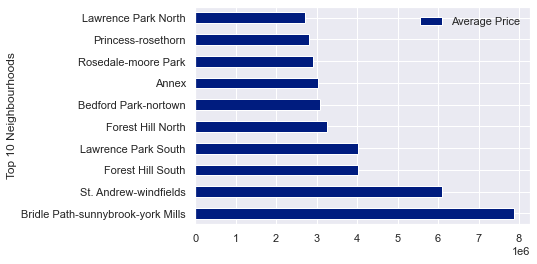

In [549]:
top_10_neighbourhood.plot(kind = 'barh', xlabel = 'Top 10 Neighbourhoods', ylabel = 'Average Lisitng Price', grid = True);

# 10 neighbourhoods with lowest average listed price

In [318]:
#last 10 neighbourhoods with lowest average listed price
least_10_neighbourhood = data.groupby('neighbourhood')['listed_price'].mean().sort_values(ascending=True).head(10)
#df2 = df.rename({'a': 'X', 'b': 'Y'}, axis=1) 
least_10_neighbourhood = pd.DataFrame(least_10_neighbourhood).rename({'listed_price': 'Average price'}, axis = 1)
least_10_neighbourhood

,Average price
neighbourhood,
Black Creek,492059.400000
Flemingdon Park,612159.963636
Dorset Park,663458.960000
Ionview,667498.166667
Crescent Town,675339.814815
Malvern,688895.307692
Mount Olive-silverstone-jamestown,695752.423077
Elms-old Rexdale,696647.320000
Henry Farm,739164.058824


<AxesSubplot:ylabel='Last 10 neighbourhoods'>

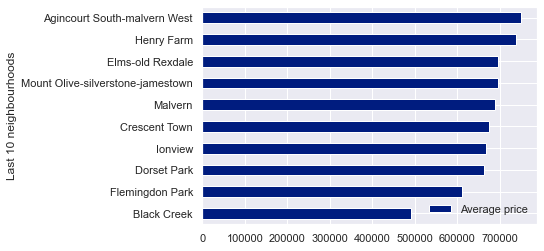

In [551]:
least_10_neighbourhood.plot(kind = 'barh', xlabel = 'Last 10 neighbourhoods', grid = True)

# Average of walk score by Neighbourhood

In [552]:
#average of walk score of top 10 neighbourhoods
top_10_neighbourhood_walk_score = data.groupby('neighbourhood')['walk_score'].mean().sort_values(ascending=False).head(10)
top_10_neighbourhood_walk_score = pd.DataFrame(top_10_neighbourhood_walk_score).rename({'walk_score': 'Average Walk Score'}, axis = 1)
top_10_neighbourhood_walk_score

,Average Walk Score
neighbourhood,
Playter Estates-danforth,88.000000
North Riverdale,86.375000
Danforth,86.375000
Woodbine-lumsden,83.666667
Palmerston-little Italy,82.781250
Greenwood-coxwell,80.571429
Danforth Village-east York,79.640000
Wychwood,79.066667
Dufferin Grove,79.000000


<AxesSubplot:ylabel='Top 10 Neighbourhoods'>

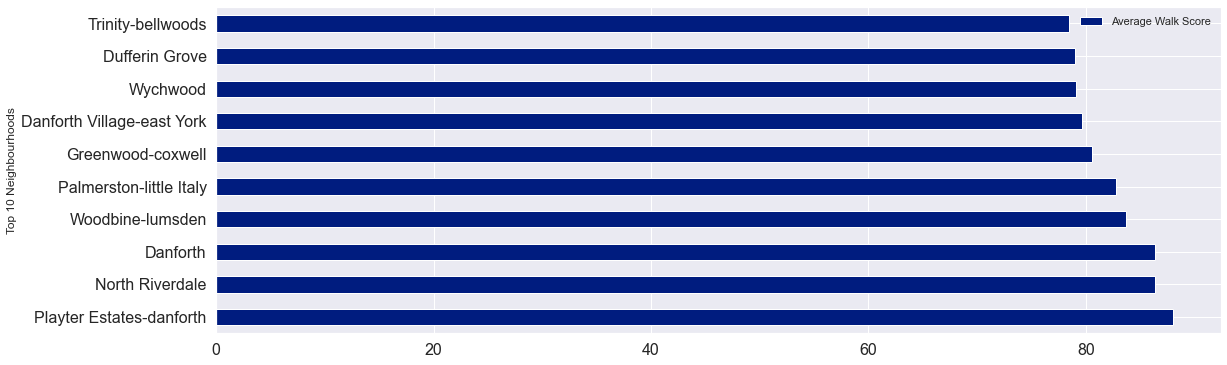

In [554]:
top_10_neighbourhood_walk_score.plot(kind = 'barh', xlabel = 'Top 10 Neighbourhoods', figsize = (18,6), fontsize = 16, grid = True)

In [555]:
# Last 10 with least average walk score
last_10_neighbourhood_walk_score = data.groupby('neighbourhood')['walk_score'].mean().sort_values(ascending=True).head(10)
last_10_neighbourhood_walk_score= pd.DataFrame(last_10_neighbourhood_walk_score).rename({'walk_score': 'Average Walk Score'}, axis = 1)
last_10_neighbourhood_walk_score

,Average Walk Score
neighbourhood,
Centennial Scarborough,30.636364
Highland Creek,34.250000
Rouge E11,34.583333
Princess-rosethorn,35.880000
Morningside,37.052632
Humberlea-pelmo Park W5,37.470588
Bridle Path-sunnybrook-york Mills,37.750000
St. Andrew-windfields,39.944444
Bayview Woods-steeles,40.400000


<AxesSubplot:ylabel='Last 10 Neighbourhoods'>

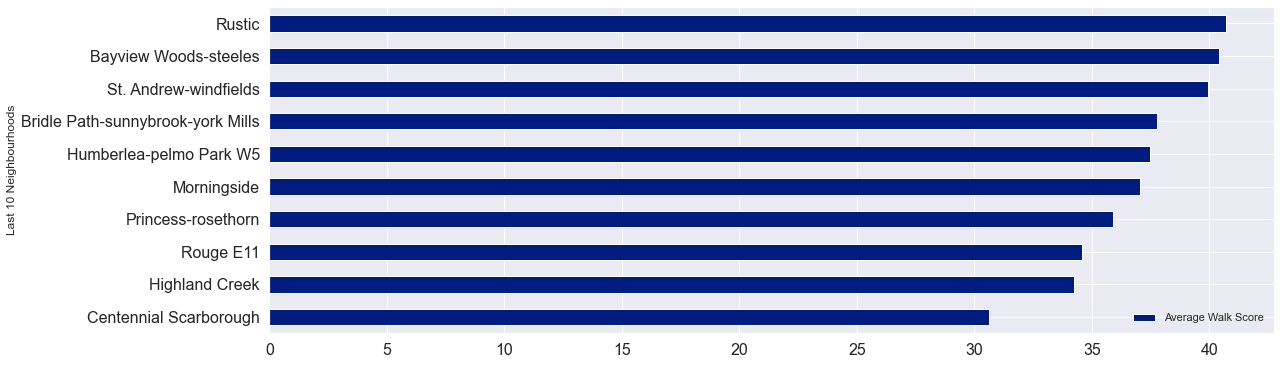

In [556]:
last_10_neighbourhood_walk_score.plot(kind='barh', xlabel = 'Last 10 Neighbourhoods', figsize = (18,6), fontsize = 16, grid = True)

# Property Tax Analysis (Ranking by neighbourhood)

#### Top 10 Neighourhoods with highest property tax

In [557]:
# Top 10 by average property tax
top_10_neighbourhood_property_tax = data.groupby('neighbourhood')['property_tax'].mean().sort_values(ascending=False).head(10)
top_10_neighbourhood_property_tax = pd.DataFrame(top_10_neighbourhood_property_tax).rename({'property_tax': 'Average Property Tax'}, axis = 1)
top_10_neighbourhood_property_tax

,Average Property Tax
neighbourhood,
Bridle Path-sunnybrook-york Mills,21711.000000
St. Andrew-windfields,19656.722222
Forest Hill South,12810.837209
Lawrence Park South,10990.724138
Forest Hill North,10526.900000
Bedford Park-nortown,10013.071429
Lawrence Park North,9785.520000
Princess-rosethorn,8865.120000
Rosedale-moore Park,8778.218750


<AxesSubplot:ylabel='Top 10 Neighbourhoods by Highest Tax'>

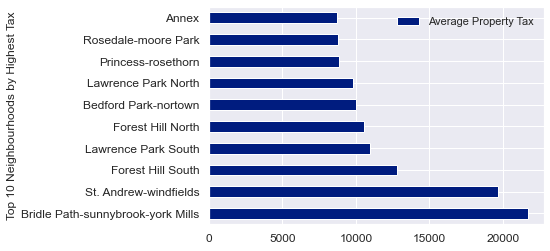

In [559]:
top_10_neighbourhood_property_tax.plot(kind = 'barh', xlabel = 'Top 10 Neighbourhoods by Highest Tax', fontsize = 12, grid = True)

#### 10 neighbourhoods with lowest property tax

In [560]:
# Last 10 by average property tax
last_10_neighbourhood_property_tax = data.groupby('neighbourhood')['property_tax'].mean().sort_values(ascending=True).head(10)
last_10_neighbourhood_property_tax = pd.DataFrame(last_10_neighbourhood_property_tax).rename({'property_tax': 'Average Property Tax'}, axis = 1)
last_10_neighbourhood_property_tax

,Average Property Tax
neighbourhood,
Black Creek,994.450000
Crescent Town,1469.259259
Mount Olive-silverstone-jamestown,1529.788462
Flemingdon Park,1581.000000
Elms-old Rexdale,1688.800000
Dorset Park,1706.360000
Malvern,1802.092308
Woburn,2265.873016
Kennedy Park,2306.571429


<AxesSubplot:ylabel='Top 10 Neighbourhoods by Highest Tax'>

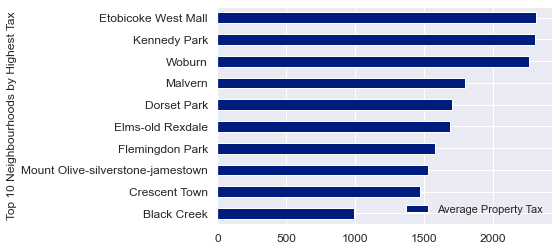

In [561]:
last_10_neighbourhood_property_tax.plot(kind = 'barh', xlabel = 'Top 10 Neighbourhoods by Highest Tax', fontsize = 12, grid = True)

### In this section, we calculated the ratio of property tax and listed price

- Clean the unclean property tax data, Some properties have very low tax which is a mistake or typo by the website
- We decided to remove those listing for our tax analysis

In [371]:
data.drop(list(data[data['property_tax'] < 100].index), inplace = True)

In [374]:
data.reset_index(drop = True, inplace = True)

In [375]:
# Add a new column for p_tax_ratio and calculate corresponding ratio
data['ptax_price_ratio'] = data['property_tax'] / data['listed_price']
data.head()

,address,city,neighbourhood,bed,bath,type,style,walk_score,lot_size,age,size,listed_price,estimated_mortgage,property_tax,last_sold_price,last_sold_year,ptax_price_ratio
0,68 Haynes Avenue,Toronto,York University Heights,4+4,6.0,SEMI-DETACHED,2-Storey,68.0,2002.4007,6-15 years,1500-2000 sqft,1199800.0,6417.0,4133.0,679000.0,2015.0,0.003445
1,59 Lockerbie Avenue,Toronto,Humberlea-pelmo Park W4,2+2,2.0,Detached,Bungalow,43.0,6250.0,No Data,No Data,1000000.0,5302.0,5561.0,387500.0,2011.0,0.005561
2,301 - 188 Bonis Avenue,Toronto,Tam O'shanter-sullivan,3,3.0,Condo Townhouse,3-Storey,43.0,No Data,N,1800-1999 sqft,888000.0,4822.0,2920.0,485000.0,2017.0,0.003288
3,3006 - 33 Charles Street E,Toronto,Church-yonge Corridor,2+1,2.0,Condo Apt,Apartment,43.0,No Data,Restrict,1200-1399 sqft,1499000.0,8087.0,5890.0,1328000.0,2019.0,0.003929
4,60 Timberbank Boulevard,Toronto,L'amoreaux,3,4.0,Condo Townhouse,2-Storey,43.0,No Data,Restrict,1200-1399 sqft,880000.0,4776.0,2439.0,910000.0,2022.0,0.002772


#### Neighbourhood with Highest Property tax and Listing Price Ratio

In [563]:
highest_10_tax_price_ratio = data.groupby('neighbourhood')['ptax_price_ratio'].mean().sort_values(ascending=False).head(10)
highest_10_tax_price_ratio = pd.DataFrame(highest_10_tax_price_ratio).rename({'ptax_price_ratio': 'Property Tax : Listed Price'}, axis = 1)
highest_10_tax_price_ratio

,Property Tax : Listed Price
neighbourhood,
Danforth,0.005133
Junction Area,0.004833
Mount Pleasant East,0.004718
Forest Hill South,0.004560
Lawrence Park North,0.004254
Birchcliffe-cliffside,0.004217
Dovercourt-wallace Emerson-junction,0.004193
Trinity-bellwoods,0.004179
Roncesvalles,0.004168


<AxesSubplot:ylabel='Top 10 Neighbourhoods(Highest tax/price ratio)'>

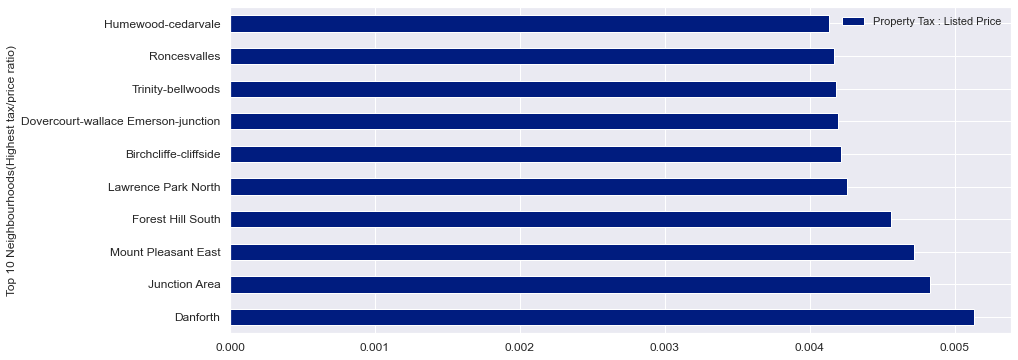

In [564]:
highest_10_tax_price_ratio.plot(kind='barh', xlabel = 'Top 10 Neighbourhoods(Highest tax/price ratio)', figsize=(14,6), fontsize = 12, grid = True)

#### Neighbourhoods with Lowest Property tax and Listing Price Ratio

In [565]:
least_10_tax_price_ratio = data.groupby('neighbourhood')['ptax_price_ratio'].mean().sort_values(ascending=True).head(10)
least_10_tax_price_ratio = pd.DataFrame(least_10_tax_price_ratio).rename({'ptax_price_ratio': 'Property Tax : Listed Price'}, axis = 1)
least_10_tax_price_ratio

,Property Tax : Listed Price
neighbourhood,
Black Creek,0.001574
Crescent Town,0.002057
Mount Olive-silverstone-jamestown,0.002093
Elms-old Rexdale,0.002185
Scarborough Village,0.002397
Dorset Park,0.002433
Morningside,0.002523
Flemingdon Park,0.002546
Mount Dennis,0.002560


<AxesSubplot:ylabel='Last 10 Neighbourhoods(Lowest tax/price ratio)'>

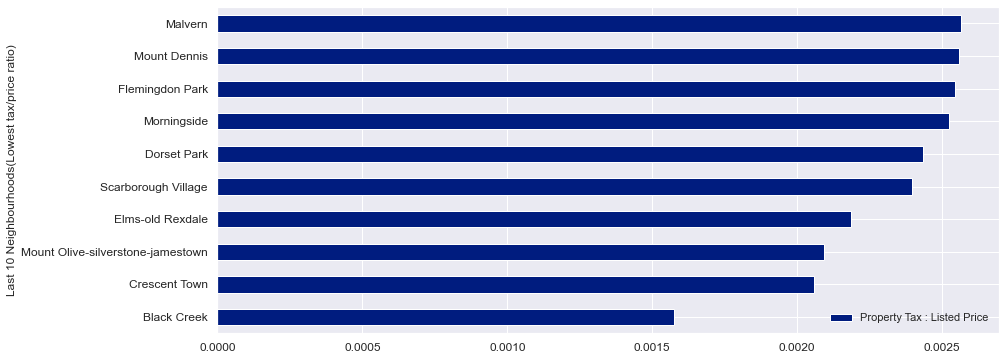

In [567]:
least_10_tax_price_ratio.plot(kind='barh', xlabel = 'Last 10 Neighbourhoods(Lowest tax/price ratio)', figsize=(14,6), fontsize = 12, grid = True)

### A plot showing correlation between listing price and corresponding Property tax along with their Distribution

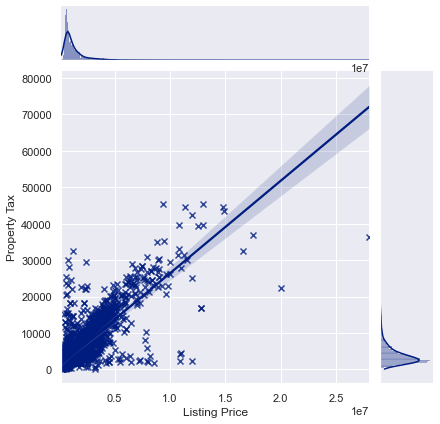

In [580]:
dist2 = data[data['property_tax'] < 50000]
ax3 = sns.jointplot(x='listed_price',y= 'property_tax',data=dist2,kind="reg", marker = 'x')
ax3.set_axis_labels('Listing Price', 'Property Tax')
#h.set_axis_labels('x', 'y', fontsize=16)
plt.grid() 
plt.show()

In [88]:
#price distribution by the type of house

In [426]:
dist = data[data['listed_price'] < 6000000]
dist

,address,city,neighbourhood,bed,bath,type,style,walk_score,lot_size,age,size,listed_price,estimated_mortgage,property_tax,last_sold_price,last_sold_year,ptax_price_ratio
0,68 Haynes Avenue,Toronto,York University Heights,4+4,6.0,SEMI-DETACHED,2-Storey,68.0,2002.4007,6-15 years,1500-2000 sqft,1199800.0,6417.0,4133.0,679000.0,2015.0,0.003445
1,59 Lockerbie Avenue,Toronto,Humberlea-pelmo Park W4,2+2,2.0,Detached,Bungalow,43.0,6250.0,No Data,No Data,1000000.0,5302.0,5561.0,387500.0,2011.0,0.005561
2,301 - 188 Bonis Avenue,Toronto,Tam O'shanter-sullivan,3,3.0,Condo Townhouse,3-Storey,43.0,No Data,N,1800-1999 sqft,888000.0,4822.0,2920.0,485000.0,2017.0,0.003288
3,3006 - 33 Charles Street E,Toronto,Church-yonge Corridor,2+1,2.0,Condo Apt,Apartment,43.0,No Data,Restrict,1200-1399 sqft,1499000.0,8087.0,5890.0,1328000.0,2019.0,0.003929
4,60 Timberbank Boulevard,Toronto,L'amoreaux,3,4.0,Condo Townhouse,2-Storey,43.0,No Data,Restrict,1200-1399 sqft,880000.0,4776.0,2439.0,910000.0,2022.0,0.002772
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6003,210 - 5800 Sheppard Avenue E,Toronto,Malvern,1+1,1.0,Condo Apt,Apartment,26.0,No Data,Restrict,800-899 sqft,589999.0,3107.0,825.0,629800.0,2022.0,0.001398
6004,60 Emily Avenue,Toronto,Humber Summit,4+1,4.0,Detached,2-Storey,20.0,4400.0,No Data,No Data,1400000.0,7534.0,4322.0,899900.0,2018.0,0.003087
6005,97 Clarinda Drive,Toronto,Bayview Village,4,6.0,Detached,2-Storey,48.0,4335.64,No Data,5000+ sqft,3088888.0,16960.0,13897.0,899900.0,2018.0,0.004499
6006,15 Claymore Drive,Toronto,Stonegate-queensway,3+1,2.0,Detached,Bungalow,62.0,5312.5,No Data,No Data,1428000.0,7691.0,5223.0,1428000.0,2022.0,0.003658


### Overall Price Distribution of Real Estate in the City of Toronto

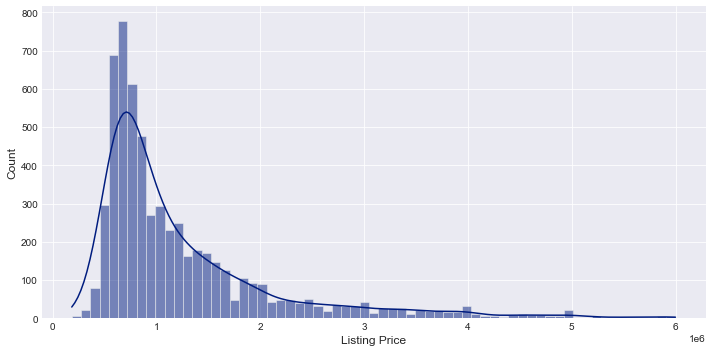

In [455]:
ax2 = sns.displot(dist['listed_price'], kde = True, aspect = 2)
ax2.set(xlabel='Listing Price', ylabel='Count')
plt.show()
#sns.displot(dist['listed_price'], kind = 'kde', aspect = 2)

## A Boxplot showing overall pattern of listing price for top 4 types of Properties

In [591]:
data2['type'].value_counts().head(4)

Condo Apt          3281
Detached           1623
SEMI-DETACHED       412
Condo Townhouse     392
Name: type, dtype: int64

In [589]:
# Filtering out top 3 types of property from the main data frame
catplot = data[((data['type'] == 'Detached') | (data['type'] == 'SEMI-DETACHED') | (data['type'] == 'Condo Apt') | (data['type']=='Condo Townhouse')) & (data['listed_price'] < 6000000) ]
catplot.head(3)

,address,city,neighbourhood,bed,bath,type,style,walk_score,lot_size,age,size,listed_price,estimated_mortgage,property_tax,last_sold_price,last_sold_year,ptax_price_ratio
0,68 Haynes Avenue,Toronto,York University Heights,4+4,6.0,SEMI-DETACHED,2-Storey,68.0,2002.4007,6-15 years,1500-2000 sqft,1199800.0,6417.0,4133.0,679000.0,2015.0,0.003445
1,59 Lockerbie Avenue,Toronto,Humberlea-pelmo Park W4,2+2,2.0,Detached,Bungalow,43.0,6250.0,No Data,No Data,1000000.0,5302.0,5561.0,387500.0,2011.0,0.005561
2,301 - 188 Bonis Avenue,Toronto,Tam O'shanter-sullivan,3,3.0,Condo Townhouse,3-Storey,43.0,No Data,N,1800-1999 sqft,888000.0,4822.0,2920.0,485000.0,2017.0,0.003288


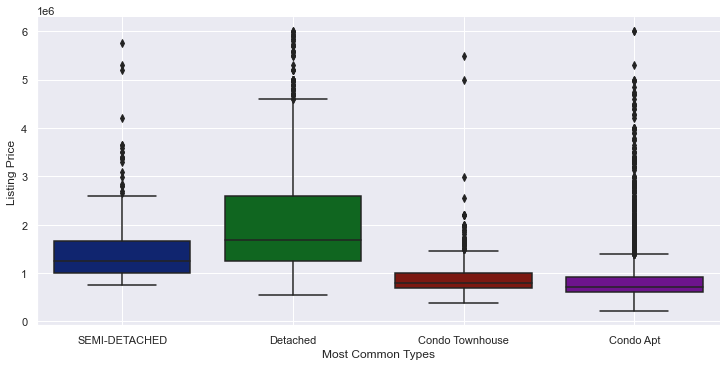

In [590]:
ax = sns.catplot(x='type' ,y='listed_price',data=catplot,kind='box',aspect = 2)
ax.set(xlabel='Most Common Types', ylabel='Listing Price')
plt.grid()
plt.show() 

In [633]:
median_data = catplot.groupby('type')['listed_price'].median().sort_values(ascending = False)
median_data = pd.DataFrame(median_data).rename({'listed_price': 'Median Price'}, axis = 1)
median_data

,Median Price
type,
Detached,1677000.0
SEMI-DETACHED,1249450.0
Condo Townhouse,799000.0
Condo Apt,719000.0


# Analysis on Appreciation of the Properties

#### Calculate yearly average appreciation of each property and add to a new column 'avg_appreciation_per_year'

In [602]:
for i in range(len(data['last_sold_year'])):
    if data['last_sold_year'][i] == 2022:
        data['avg_appreciation_per_year'] = (data['listed_price'] - data['last_sold_price']) / (2023 - data['last_sold_year'])
    else:
        data['avg_appreciation_per_year'] = (data['listed_price'] - data['last_sold_price']) / (2022 - data['last_sold_year'])
data[['listed_price', 'last_sold_price', 'avg_appreciation_per_year', 'last_sold_year']].head()

,listed_price,last_sold_price,avg_appreciation_per_year,last_sold_year
0,1199800.0,679000.0,65100.000000,2015.0
1,1000000.0,387500.0,51041.666667,2011.0
2,888000.0,485000.0,67166.666667,2017.0
3,1499000.0,1328000.0,42750.000000,2019.0
4,880000.0,910000.0,-30000.000000,2022.0


In [604]:
top_10_neighbourhood_by_appreciation = data.groupby('neighbourhood')['avg_appreciation_per_year'].mean().sort_values(ascending = False).head(10)
top_10_neighbourhood_by_appreciation = pd.DataFrame(top_10_neighbourhood_by_appreciation).rename({'avg_appreciation_per_year':'Average Appreciation per Year'}, axis = 1)
top_10_neighbourhood_by_appreciation

,Average Appreciation per Year
neighbourhood,
Bridle Path-sunnybrook-york Mills,754648.423250
Lawrence Park South,619158.871143
Princess-rosethorn,536517.742857
Playter Estates-danforth,377516.706349
Annex,276663.810481
Forest Hill South,263963.994287
Parkwoods-donalda,232352.756533
Casa Loma,210902.242263
Palmerston-little Italy,204635.834978


<AxesSubplot:ylabel='Neighbourhoods with Highest Appreciation'>

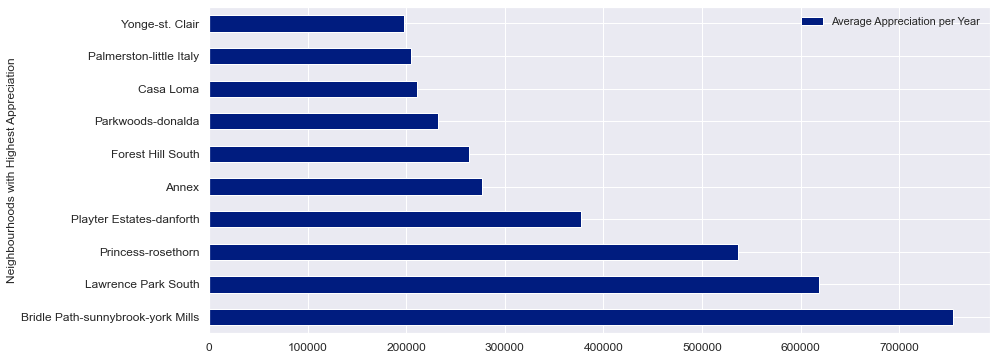

In [606]:
top_10_neighbourhood_by_appreciation.plot(kind='barh', xlabel = 'Neighbourhoods with Highest Appreciation', figsize=(14,6), fontsize = 12, grid = True)

# Find out numbers most popular types of properties by Each Neighbourhoods 

#### Condominium

In [611]:
condo = data[data['type'] == 'Condo Apt']
condo_numbers = condo.groupby('neighbourhood')['address'].count().sort_values(ascending = False).head(10)
condo_numbers = pd.DataFrame(condo_numbers).rename({'address':'Number of Condos in listing'}, axis = 1)
condo_numbers

,Number of Condos in listing
neighbourhood,
Waterfront Communities C1,466
Church-yonge Corridor,204
Bay Street Corridor,144
Mimico,140
Willowdale East,124
Waterfront Communities C8,119
Niagara,117
Mount Pleasant West,111
Islington-city Centre West,81


#### Detached House

In [612]:
detached = data[data['type'] == 'Detached']
detached_numbers = detached.groupby('neighbourhood')['address'].count().sort_values(ascending = False).head(10)
detached_numbers = pd.DataFrame(detached_numbers).rename({'address':'Number of Detached house in listing'}, axis = 1)
detached_numbers



,Number of Detached house in listing
neighbourhood,
St. Andrew-windfields,46
Stonegate-queensway,42
Islington-city Centre West,40
Downsview-roding-cfb,39
Bedford Park-nortown,37
Bridle Path-sunnybrook-york Mills,35
Willowdale East,34
Banbury-don Mills,32
Birchcliffe-cliffside,31


#### Semi-Detached House

In [613]:
semi_detached = data[data2['type'] == 'SEMI-DETACHED']
semi_detached_numbers = semi_detached.groupby('neighbourhood')['address'].count().sort_values(ascending = False).head(10)
semi_detached_numbers = pd.DataFrame(semi_detached_numbers).rename({'address': 'Number of Semi Detached house in listing'}, axis = 1)
semi_detached_numbers

<ipython-input-613-c76a41dbb56b>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  semi_detached = data[data2['type'] == 'SEMI-DETACHED']


,Number of Semi Detached house in listing
neighbourhood,
Annex,15
Corso Italia-davenport,14
Dovercourt-wallace Emerson-junction,13
Palmerston-little Italy,13
The Beaches,11
Greenwood-coxwell,11
Waterfront Communities C1,9
Church-yonge Corridor,8
South Riverdale,8


#### Condo-Townhouse

In [614]:
condo_twn = data2[data2['type'] == 'Condo Townhouse']
condo_twn_numbers = condo_twn.groupby('neighbourhood')['address'].count().sort_values(ascending = False).head(10)
condo_twn_numbers = pd.DataFrame(condo_twn_numbers).rename({'address': 'Number of Condo Townhouse in Listing'}, axis = 1)
condo_twn_numbers

,Number of Condo Townhouse in Listing
neighbourhood,
West Humber-clairville,20
Malvern,17
Willowdale East,17
Hillcrest Village,15
West Hill,14
Niagara,14
L'amoreaux,13
Downsview-roding-cfb,13
Islington-city Centre West,12


# Find the the top most expensive houses and Compare with their respective neighbourhood price averages

Firstly, We filter the averages of each neighbourhood

In [595]:
average = data.groupby(['neighbourhood'])['listed_price'].mean()
average = pd.DataFrame({'neighbourhood':average.index, 'average_by_neighbourhood':average.values})
average.head(3)

,neighbourhood,average_by_neighbourhood
0,Agincourt North,7.832034e+05
1,Agincourt South-malvern West,7.508593e+05
2,Alderwood,1.473328e+06


Secondly, we sort the properties by their prices in descending order

In [596]:
top_most_expensive = data.sort_values(by = 'listed_price', ascending = False).head(10)
top_most_expensive.head(3)

,address,city,neighbourhood,bed,bath,type,style,walk_score,lot_size,age,size,listed_price,estimated_mortgage,property_tax,last_sold_price,last_sold_year,ptax_price_ratio
4286,88 Forest Heights Boulevard,Toronto,St. Andrew-windfields,6+1,11.0,Detached,2-Storey,16.0,28900.0,No Data,No Data,29800000.0,166036.0,60000.0,29800000.0,2022.0,0.002013
2640,30 High Point Road,Toronto,Bridle Path-sunnybrook-york Mills,8,12.0,Detached,2 1/2 Storey,11.0,95876.0,No Data,No Data,28000000.0,155990.0,36384.0,629900.0,2022.0,0.001299
5600,11 High Point Road,Toronto,Bridle Path-sunnybrook-york Mills,9+4,14.0,Detached,2 1/2 Storey,6.0,104360.4744,No Data,No Data,27000000.0,150409.0,68312.0,12800000.0,2015.0,0.002530


Lastly we merge both tables on 'neighbourhood'. This will give the average neighbourhod price for each property in each row

In [597]:
top = top_most_expensive.merge(average, on = 'neighbourhood')

In [598]:
top.head()

,address,city,neighbourhood,bed,bath,type,style,walk_score,lot_size,age,size,listed_price,estimated_mortgage,property_tax,last_sold_price,last_sold_year,ptax_price_ratio,average_by_neighbourhood
0,88 Forest Heights Boulevard,Toronto,St. Andrew-windfields,6+1,11.0,Detached,2-Storey,16.0,28900.0,No Data,No Data,29800000.0,166036.0,60000.0,29800000.0,2022.0,0.002013,6.107479e+06
1,101 Old Colony Road,Toronto,St. Andrew-windfields,5+1,10.0,Detached,2-Storey,11.0,30125.7,No Data,No Data,18500000.0,102970.0,54706.0,19800000.0,2021.0,0.002957,6.107479e+06
2,30 Fifeshire Road,Toronto,St. Andrew-windfields,9+3,16.0,Detached,3-Storey,39.0,24200.0,6-15 years,5000+ sqft,17888000.0,99555.0,55000.0,17888000.0,2022.0,0.003075,6.107479e+06
3,30 Fifeshire Road,Toronto,St. Andrew-windfields,9+3,16.0,Detached,3-Storey,39.0,24200.0,6-15 years,5000+ sqft,17888000.0,99555.0,55000.0,17888000.0,2022.0,0.003075,6.107479e+06
4,382 Old Yonge Street,Toronto,St. Andrew-windfields,6+1,13.0,Detached,2-Storey,42.0,67743.58,No Data,No Data,17500000.0,97389.0,36869.0,17500000.0,2022.0,0.002107,6.107479e+06


Plot the prices and average on single grouped barplot

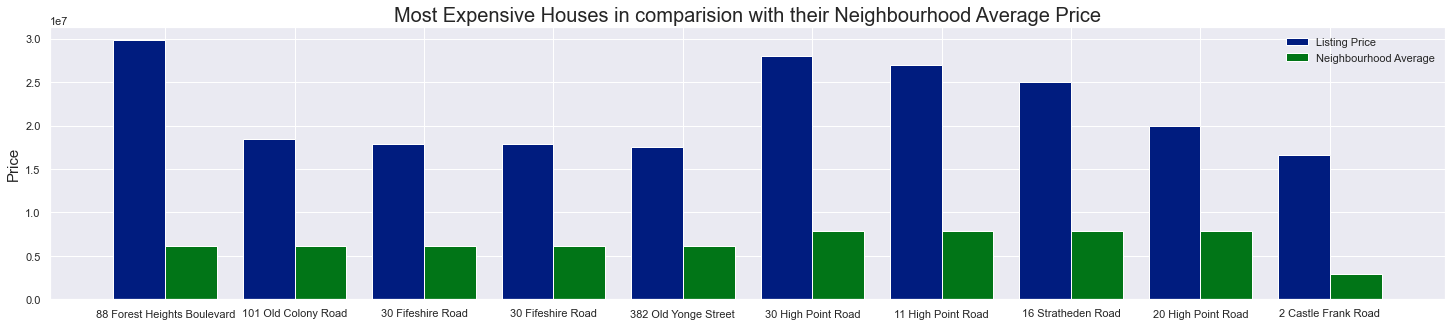

In [600]:
X = top['address']
Ylist = top['listed_price']
Zlist = top['average_by_neighbourhood']

X_axis = np.arange(len(X))
f, ax = plt.subplots(figsize=(25,5))
plt.bar(X_axis - 0.2, Ylist, 0.4, label = 'Listing Price')
plt.bar(X_axis + 0.2, Zlist, 0.4, label = 'Neighbourhood Average')
plt.xticks(X_axis, X, fontsize =11)
plt.ylabel("Price", fontsize = 15)
plt.title("Most Expensive Houses in comparision with their Neighbourhood Average Price", {'fontsize':20})
plt.legend()
plt.grid();


## Estimated Mortgage Analysis

In [618]:
top_4_types_highest_mortgage = data.groupby('type')['estimated_mortgage'].mean().sort_values(ascending = False).head(4)
top_4_types_highest_mortgage = pd.DataFrame(top_4_types_highest_mortgage).rename({'estimated_mortgage' : 'Average Estimated Mortgage'}, axis = 1)
top_4_types_highest_mortgage

,Average Estimated Mortgage
type,
Land,31239.500000
Multiplex,20733.600000
Detached,13399.491985
Fourplex,13220.250000


<AxesSubplot:ylabel='Type of Properties'>

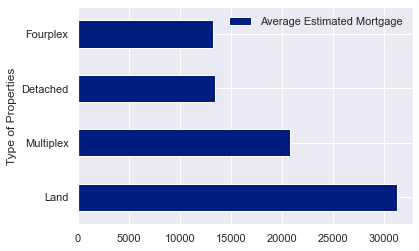

In [630]:
top_4_types_highest_mortgage.plot(kind = 'barh', xlabel = 'Type of Properties', ylabel = 'Average Estimated Mortgage', grid = True)

#### Some Random Data Gather for Presentation

In [622]:
data

,address,city,neighbourhood,bed,bath,type,style,walk_score,lot_size,age,size,listed_price,estimated_mortgage,property_tax,last_sold_price,last_sold_year,ptax_price_ratio,avg_appreciation_per_year
0,68 Haynes Avenue,Toronto,York University Heights,4+4,6.0,SEMI-DETACHED,2-Storey,68.0,2002.4007,6-15 years,1500-2000 sqft,1199800.0,6417.0,4133.0,679000.0,2015.0,0.003445,65100.000000
1,59 Lockerbie Avenue,Toronto,Humberlea-pelmo Park W4,2+2,2.0,Detached,Bungalow,43.0,6250.0,No Data,No Data,1000000.0,5302.0,5561.0,387500.0,2011.0,0.005561,51041.666667
2,301 - 188 Bonis Avenue,Toronto,Tam O'shanter-sullivan,3,3.0,Condo Townhouse,3-Storey,43.0,No Data,N,1800-1999 sqft,888000.0,4822.0,2920.0,485000.0,2017.0,0.003288,67166.666667
3,3006 - 33 Charles Street E,Toronto,Church-yonge Corridor,2+1,2.0,Condo Apt,Apartment,43.0,No Data,Restrict,1200-1399 sqft,1499000.0,8087.0,5890.0,1328000.0,2019.0,0.003929,42750.000000
4,60 Timberbank Boulevard,Toronto,L'amoreaux,3,4.0,Condo Townhouse,2-Storey,43.0,No Data,Restrict,1200-1399 sqft,880000.0,4776.0,2439.0,910000.0,2022.0,0.002772,-30000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6003,210 - 5800 Sheppard Avenue E,Toronto,Malvern,1+1,1.0,Condo Apt,Apartment,26.0,No Data,Restrict,800-899 sqft,589999.0,3107.0,825.0,629800.0,2022.0,0.001398,-39801.000000
6004,60 Emily Avenue,Toronto,Humber Summit,4+1,4.0,Detached,2-Storey,20.0,4400.0,No Data,No Data,1400000.0,7534.0,4322.0,899900.0,2018.0,0.003087,100020.000000
6005,97 Clarinda Drive,Toronto,Bayview Village,4,6.0,Detached,2-Storey,48.0,4335.64,No Data,5000+ sqft,3088888.0,16960.0,13897.0,899900.0,2018.0,0.004499,437797.600000
6006,15 Claymore Drive,Toronto,Stonegate-queensway,3+1,2.0,Detached,Bungalow,62.0,5312.5,No Data,No Data,1428000.0,7691.0,5223.0,1428000.0,2022.0,0.003658,0.000000


In [626]:
top

,address,city,neighbourhood,bed,bath,type,style,walk_score,lot_size,age,size,listed_price,estimated_mortgage,property_tax,last_sold_price,last_sold_year,ptax_price_ratio,average_by_neighbourhood
0,88 Forest Heights Boulevard,Toronto,St. Andrew-windfields,6+1,11.0,Detached,2-Storey,16.0,28900.0,No Data,No Data,29800000.0,166036.0,60000.0,29800000.0,2022.0,0.002013,6.107479e+06
1,101 Old Colony Road,Toronto,St. Andrew-windfields,5+1,10.0,Detached,2-Storey,11.0,30125.7,No Data,No Data,18500000.0,102970.0,54706.0,19800000.0,2021.0,0.002957,6.107479e+06
2,30 Fifeshire Road,Toronto,St. Andrew-windfields,9+3,16.0,Detached,3-Storey,39.0,24200.0,6-15 years,5000+ sqft,17888000.0,99555.0,55000.0,17888000.0,2022.0,0.003075,6.107479e+06
3,30 Fifeshire Road,Toronto,St. Andrew-windfields,9+3,16.0,Detached,3-Storey,39.0,24200.0,6-15 years,5000+ sqft,17888000.0,99555.0,55000.0,17888000.0,2022.0,0.003075,6.107479e+06
4,382 Old Yonge Street,Toronto,St. Andrew-windfields,6+1,13.0,Detached,2-Storey,42.0,67743.58,No Data,No Data,17500000.0,97389.0,36869.0,17500000.0,2022.0,0.002107,6.107479e+06
5,30 High Point Road,Toronto,Bridle Path-sunnybrook-york Mills,8,12.0,Detached,2 1/2 Storey,11.0,95876.0,No Data,No Data,28000000.0,155990.0,36384.0,629900.0,2022.0,0.001299,7.880527e+06
6,11 High Point Road,Toronto,Bridle Path-sunnybrook-york Mills,9+4,14.0,Detached,2 1/2 Storey,6.0,104360.4744,No Data,No Data,27000000.0,150409.0,68312.0,12800000.0,2015.0,0.002530,7.880527e+06
7,16 Stratheden Road,Toronto,Bridle Path-sunnybrook-york Mills,6,10.0,Detached,2-Storey,29.0,20250.0,No Data,No Data,25000000.0,139247.0,68217.0,26900000.0,2021.0,0.002729,7.880527e+06
8,20 High Point Road,Toronto,Bridle Path-sunnybrook-york Mills,5+1,10.0,Detached,2-Storey,11.0,130410.0,No Data,5000+ sqft,20000000.0,111342.0,22243.0,20000000.0,2021.0,0.001112,7.880527e+06
9,2 Castle Frank Road,Toronto,Rosedale-moore Park,7,9.0,Detached,3-Storey,51.0,14550.0,51-99 years,5000+ sqft,16595000.0,92339.0,32639.0,6750000.0,2016.0,0.001967,2.917414e+06


In [629]:
top[['address', 'bed', 'bath', 'type', 'lot_size', 'listed_price']]

,address,bed,bath,type,lot_size,listed_price
0,88 Forest Heights Boulevard,6+1,11.0,Detached,28900.0,29800000.0
1,101 Old Colony Road,5+1,10.0,Detached,30125.7,18500000.0
2,30 Fifeshire Road,9+3,16.0,Detached,24200.0,17888000.0
3,30 Fifeshire Road,9+3,16.0,Detached,24200.0,17888000.0
4,382 Old Yonge Street,6+1,13.0,Detached,67743.58,17500000.0
5,30 High Point Road,8,12.0,Detached,95876.0,28000000.0
6,11 High Point Road,9+4,14.0,Detached,104360.4744,27000000.0
7,16 Stratheden Road,6,10.0,Detached,20250.0,25000000.0
8,20 High Point Road,5+1,10.0,Detached,130410.0,20000000.0
9,2 Castle Frank Road,7,9.0,Detached,14550.0,16595000.0


In [635]:
data['type'].value_counts().head(4)

Condo Apt          3279
Detached           1622
SEMI-DETACHED       412
Condo Townhouse     391
Name: type, dtype: int64

In [637]:
data['neighbourhood'].value_counts()

Waterfront Communities C1        479
Church-yonge Corridor            213
Mimico                           188
Willowdale East                  176
Bay Street Corridor              146
                                ... 
Humberlea-pelmo Park W4            7
Thistletown-beaumonde Heights      6
Ionview                            6
Playter Estates-danforth           6
Thorncliffe Park                   5
Name: neighbourhood, Length: 143, dtype: int64